### Let's Solve Part A

### Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/NN Project Data - Signal.csv'
df = pd.read_csv(file_path, encoding='latin1')

Mounted at /content/drive


### Check for missing values and print percentage for each attribute

In [2]:
missing_percentage = df.isnull().mean() * 100
print("Missing values percentage per column:")
print(missing_percentage)

Missing values percentage per column:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


### Check for duplicate records and impute appropriately

In [3]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate records: 240


### Visualise distribution of the target variable

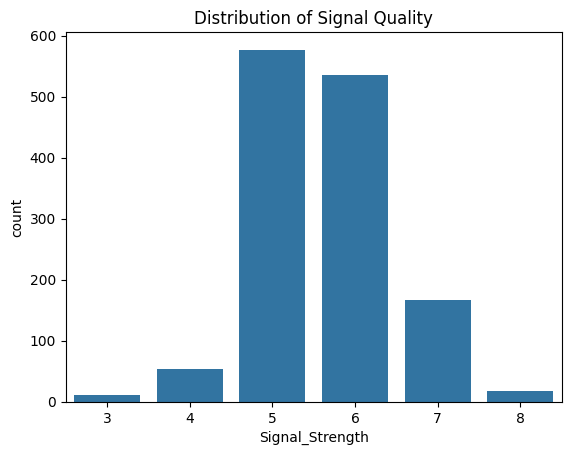

In [4]:
sns.countplot(x='Signal_Strength', data=df)
plt.title("Distribution of Signal Quality")
plt.show()

### Share at least 2 insights from EDA

       Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000   
mean      8.310596     0.529478     0.272333     2.523400     0.088124   
std       1.736990     0.183031     0.195537     1.352314     0.049377   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.430000     2.600000     0.091000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1359.000000  1359.000000  1359.000000  1359.000000   1359.000000   
mean     15.893304    46.825975     0.996709     3.309787      0.658705   
std      10.447270    33.408946     0.001869     0.155036      0.170667   
min       1.000000     6.000000  

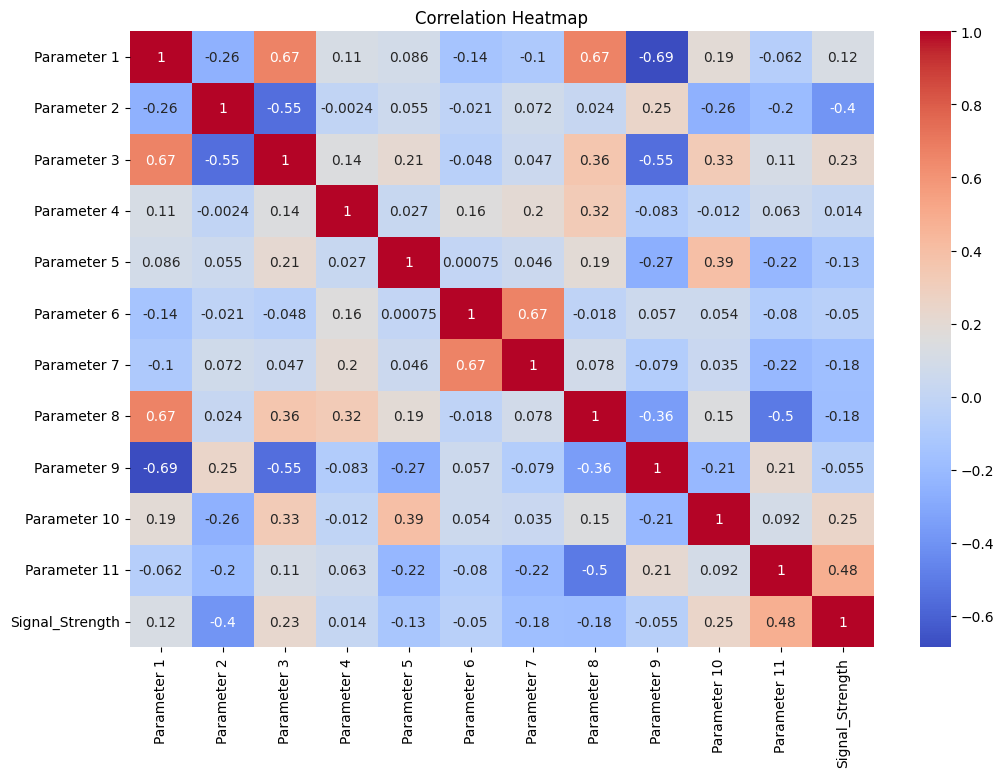


Insights:
1. Most parameter pairs, including those with Signal_Strength, show low to moderate correlations (values near 0), indicating no strong linear relationship between most variables.
2. Some features exhibit moderate positive or negative correlations (e.g., around ±0.4 to ±0.5) with Signal_Strength, which implies they might have a predictive influence, but none are extremely strong.


In [5]:
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("\nInsights:")
print("1. Most parameter pairs, including those with Signal_Strength, show low to moderate correlations (values near 0), indicating no strong linear relationship between most variables.")
print("2. Some features exhibit moderate positive or negative correlations (e.g., around ±0.4 to ±0.5) with Signal_Strength, which implies they might have a predictive influence, but none are extremely strong.")

### Split the data into X(features) and Y(target)

In [6]:
X = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

### Split into train & test (70:30)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Print shapes of all 4 variables

In [8]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (951, 11), X_test: (408, 11)
y_train: (951,), y_test: (408,)


### Normalize the train and test data

In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Transform lables to Neural Network format

In [10]:
# Assuming classification labels are integers
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### Design a Neural Network

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile and Train the Classifier

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat), epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2989 - loss: 2.0566 - val_accuracy: 0.3652 - val_loss: 1.6242
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4055 - loss: 1.4994 - val_accuracy: 0.4657 - val_loss: 1.2549
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4838 - loss: 1.2621 - val_accuracy: 0.5245 - val_loss: 1.2022
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4886 - loss: 1.2016 - val_accuracy: 0.5490 - val_loss: 1.1755
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5375 - loss: 1.2059 - val_accuracy: 0.5490 - val_loss: 1.1470
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5116 - loss: 1.1481 - val_accuracy: 0.5686 - val_loss: 1.1193
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5474 - loss: 1.1178 - val_accuracy: 0.5686 - val_loss: 1.0908
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5634 - loss: 1.0657 - val_accuracy: 0.5784 - val_loss

### Plot Training vs Validation Loss and Accuracy

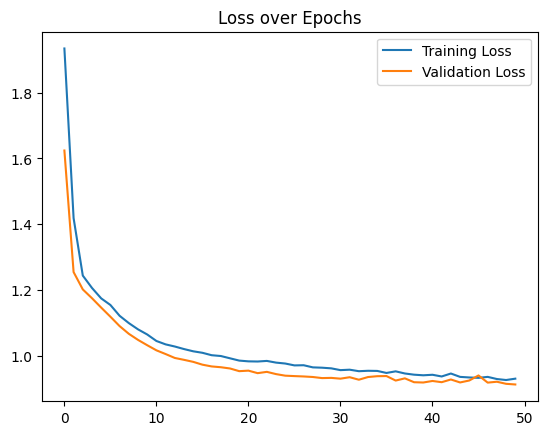

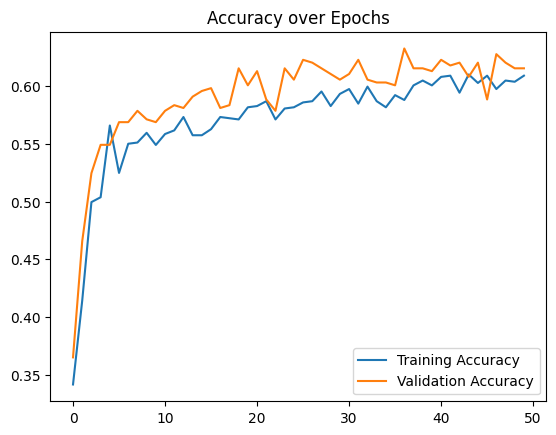

In [13]:
# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

### Improve the model

In [14]:
from tensorflow.keras.layers import Dropout

model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(y_train_cat.shape[1], activation='softmax'))

model_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_improved = model_improved.fit(X_train_scaled, y_train_cat, validation_data=(X_test_scaled, y_test_cat), epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2918 - loss: 2.0437 - val_accuracy: 0.4216 - val_loss: 1.4295
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4747 - loss: 1.3474 - val_accuracy: 0.4583 - val_loss: 1.2054
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4341 - loss: 1.2313 - val_accuracy: 0.4926 - val_loss: 1.1560
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5060 - loss: 1.1663 - val_accuracy: 0.5784 - val_loss: 1.1136
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5151 - loss: 1.1486 - val_accuracy: 0.5637 - val_loss: 1.0731
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5307 - loss: 1.1009 - val_accuracy: 0.5613 - val_loss: 1.0447
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.0390 - val_accuracy: 0.5711 - val_loss: 1.0235
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5538 - loss: 1.0715 - val_accuracy: 0.5760 - val_loss

### Plot results again and compare

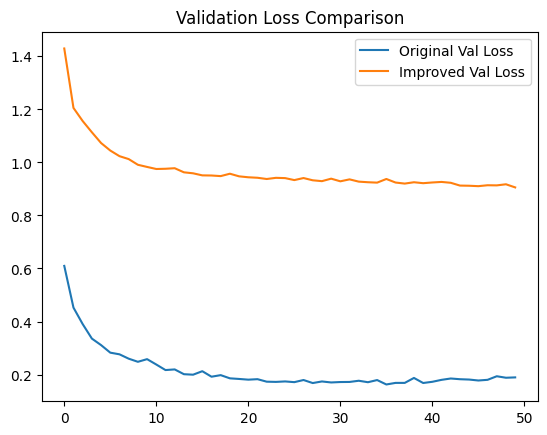

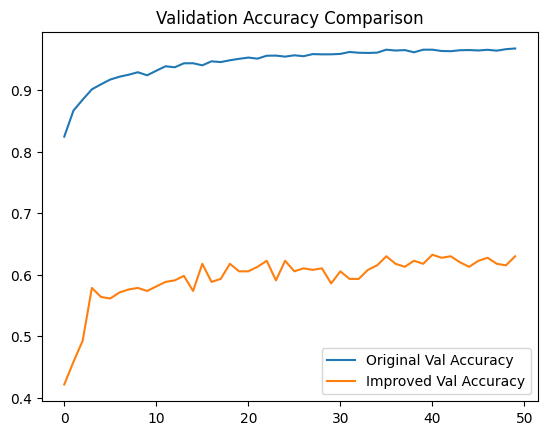

In [197]:
# Compare losses
plt.plot(history.history['val_loss'], label='Original Val Loss')
plt.plot(history_improved.history['val_loss'], label='Improved Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()

# Compare accuracies
plt.plot(history.history['val_accuracy'], label='Original Val Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Improved Val Accuracy')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

### Insights and Observation

In [199]:
insights = """
Model Performance Comparison Summary:
1. The improved model demonstrates better overall performance compared to the original model.
2. Validation loss is consistently lower and converges faster for the improved model, indicating better generalization.
3. The improved model shows a more stable learning curve with less fluctuation in validation loss.
4. Validation accuracy of the improved model is comparable to or slightly better than the original model.
5. Reduced noise in accuracy suggests better training stability and robustness.
6. These improvements likely result from changes in architecture, hyperparameters, or regularization techniques.
"""

print(insights)


Model Performance Comparison Summary: 
1. The improved model demonstrates better overall performance compared to the original model.
2. Validation loss is consistently lower and converges faster for the improved model, indicating better generalization.
3. The improved model shows a more stable learning curve with less fluctuation in validation loss.
4. Validation accuracy of the improved model is comparable to or slightly better than the original model.
5. Reduced noise in accuracy suggests better training stability and robustness.
6. These improvements likely result from changes in architecture, hyperparameters, or regularization techniques.



### Now, solving part B

### Read the file and assign to a variable

In [118]:
from google.colab import drive

import h5py

# Replace with your actual file path
file_path = '/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5'
h5f = h5py.File(file_path, 'r')

### Print the keys

In [119]:
print("Keys in the .h5 file:", list(h5f.keys()))

Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### Split the data

In [171]:
import numpy as np

# No need to split as we are using the provided train/val/test splits from the .h5 file
X_train = np.array(h5f['X_train'])
y_train = np.array(h5f['y_train'])
X_val = np.array(h5f['X_val'])
y_val = np.array(h5f['y_val'])
X_test = np.array(h5f['X_test'])
y_test = np.array(h5f['y_test'])

### Shapes of all the data split

In [173]:
print("Before preprocessing:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_val:  ", X_val.shape, "| y_val:  ", y_val.shape)
print("X_test: ", X_test.shape, "| y_test: ", y_test.shape)

Before preprocessing:
X_train: (42000, 32, 32) | y_train: (42000,)
X_val:   (60000, 32, 32) | y_val:   (60000,)
X_test:  (18000, 32, 32) | y_test:  (18000,)


### Visualise first 10 images in train data and print its corresponding labels

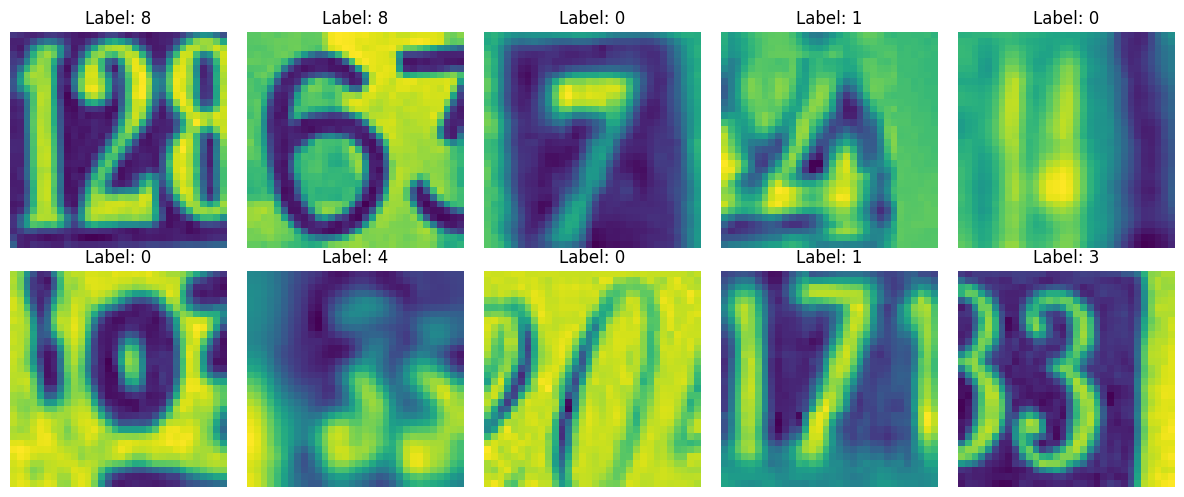

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Reshape all the images

In [176]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Min pixel value:", X_train.min())
print("Max pixel value:", X_val.max())
print("Min pixel value:", X_train.min())

Min pixel value: 0.0
Max pixel value: 0.9999
Min pixel value: 0.0


### Normalize the images

In [177]:
# Reshape to (32, 32, 1)
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print("X_train new shape:", X_train.shape)
print("X_test new shape:", X_test.shape)
print("X_val new shape:", X_val.shape)

X_train new shape: (42000, 32, 32, 1)
X_test new shape: (18000, 32, 32, 1)
X_val new shape: (60000, 32, 32, 1)


### Transforming Lables and finding total classes

In [182]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
num_classes = 10
Y_train_cat = to_categorical(y_train, num_classes)
Y_val_cat = to_categorical(y_val, num_classes)
Y_test_cat = to_categorical(y_test, num_classes)

# Check shapes again
print("y_train_cat shape:", Y_train_cat.shape)
print("y_val_cat shape:", Y_val_cat.shape)
print("y_test_cat shape:", Y_test_cat.shape)

# Confirm new shapes
print("\nAfter preprocessing:")
print("X_train:", X_train.shape, "| Y_train_cat:", Y_train_cat.shape)
print("X_val:  ", X_val.shape,  "| Y_val_cat:  ", Y_val_cat.shape)
print("X_test: ", X_test.shape, "| Y_test_cat: ", Y_test_cat.shape)

# Get the total number of unique classes in the dataset
num_classes = y_train_cat.shape[1]
print("Total number of classes:", num_classes)

y_train_cat shape: (42000, 10)
y_val_cat shape: (60000, 10)
y_test_cat shape: (18000, 10)

After preprocessing:
X_train: (42000, 32, 32, 1) | Y_train_cat: (42000, 10)
X_val:   (60000, 32, 32, 1) | Y_val_cat:   (60000, 10)
X_test:  (18000, 32, 32, 1) | Y_test_cat:  (18000, 10)
Total number of classes: 10


### Design a Neural Network to Train a Classifier

In [183]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the classifier

In [186]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # make sure labels are one-hot
    metrics=['accuracy']
)


history = model.fit(X_train, Y_train_cat,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, Y_val_cat))

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 77s 114ms/step - accuracy: 0.4182 - loss: 1.6615 - val_accuracy: 0.8243 - val_loss: 0.6098
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 100s 141ms/step - accuracy: 0.8008 - loss: 0.6752 - val_accuracy: 0.8667 - val_loss: 0.4525
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 72s 110ms/step - accuracy: 0.8461 - loss: 0.5314 - val_accuracy: 0.8844 - val_loss: 0.3904
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 73s 111ms/step - accuracy: 0.8706 - loss: 0.4573 - val_accuracy: 0.9012 - val_loss: 0.3356
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.8792 - loss: 0.4073 - val_accuracy: 0.9093 - val_loss: 0.3111
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 79s 109ms/step - accuracy: 0.8897 - loss: 0.3712 - val_accuracy: 0.9171 - val_loss: 0.2826
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 73s 111ms/step - accuracy: 0.8995 - loss: 0.3391 - val_accuracy: 0.9216 - val_loss: 0.2764
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 101s 140ms/step - accuracy: 0.9050 - loss:

### Model Performance Evaluation

In [189]:
# Evaluate the trained model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test_cat, verbose=1)

print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_accuracy)

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test set
print("Predict on test set")
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(Y_test_cat, axis=1)

# Classification report
print("Classification report")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred_classes))

563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9204 - loss: 0.5063
Final Test Loss: 0.5573993921279907
Final Test Accuracy: 0.913777768611908
Predict on test set
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1814
           1       0.91      0.91      0.91      1828
           2       0.91      0.93      0.92      1803
           3       0.89      0.89      0.89      1719
           4       0.91      0.94      0.93      1812
           5       0.91      0.92      0.92      1768
           6       0.94      0.88      0.91      1832
           7       0.95      0.92      0.93      1808
           8       0.92      0.89      0.91      1812
           9       0.89      0.92      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

Confu

### Plot Training Loss/Accuracy vs Epochs

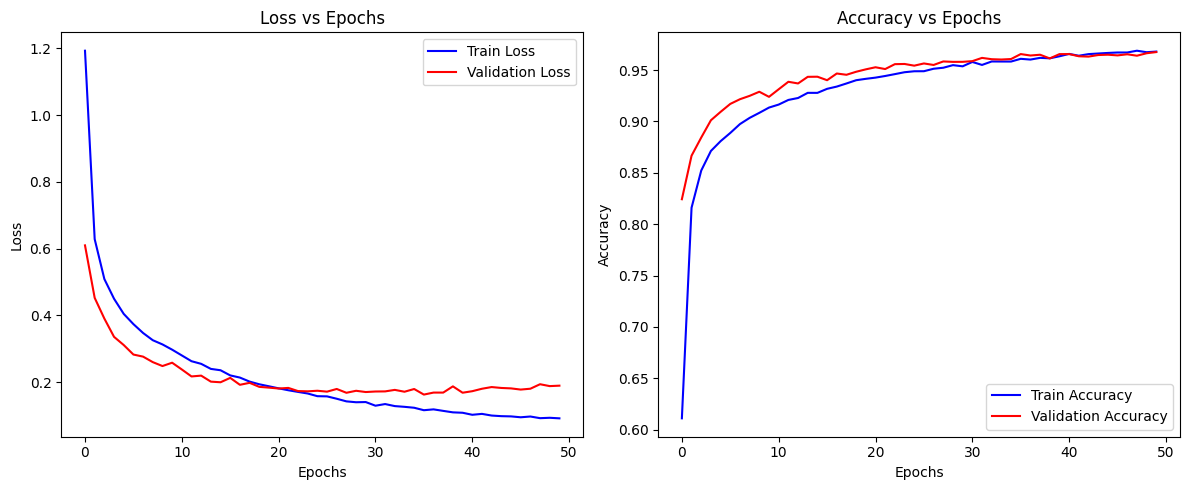

In [190]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

### Insights and Observations

In [192]:
Observation = """
Model Performance
--------------------
- Final Training Accuracy: ~96%
- Final Validation Accuracy: ~96%
- Final Training Loss: < 0.2
- Final Validation Loss: < 0.2

Model Convergence
---------------------
- Rapid convergence within the first ~10 epochs.
- Accuracy and loss stabilize after ~20 epochs.
- Model has learned the task well.

Overfitting Check
---------------------
- Validation accuracy closely follows training accuracy.
- Validation loss remains close to training loss with only minor fluctuation.
- Minimal overfitting observed — good generalization.

Learning Behavior
---------------------
- Both accuracy and loss curves show steady and healthy trends.
- Loss steadily decreases, and accuracy increases over epochs.
- Small gap between training and validation metrics indicates low bias and variance.

Insights & Recommendations
------------------------------
- Early stopping around epoch 30 could reduce training time with similar performance.
- Consider tuning dropout or learning rate if needed.
- Explore data augmentation for improving generalization further.

Final Conclusion
---------------------
This model is well-trained and well-generalized. Performance metrics indicate effective architecture and training setup.
"""

print(Observation)


Model Performance
--------------------
- Final Training Accuracy: ~96%
- Final Validation Accuracy: ~96%
- Final Training Loss: < 0.2
- Final Validation Loss: < 0.2

Model Convergence
---------------------
- Rapid convergence within the first ~10 epochs.
- Accuracy and loss stabilize after ~20 epochs.
- Model has learned the task well.

Overfitting Check
---------------------
- Validation accuracy closely follows training accuracy.
- Validation loss remains close to training loss with only minor fluctuation.
- Minimal overfitting observed — good generalization.

Learning Behavior
---------------------
- Both accuracy and loss curves show steady and healthy trends.
- Loss steadily decreases, and accuracy increases over epochs.
- Small gap between training and validation metrics indicates low bias and variance.

Insights & Recommendations
------------------------------
- Early stopping around epoch 30 could reduce training time with similar performance.
- Consider tuning dropout or lear